In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# if we have os imported we can see if a file exists
def acquire_student_grades():
    if os.path.exists('student_grades.csv'):
        return pd.read_csv('student_grades.csv')
    else:
        print('Could not find student_grades file')
        return None

In [ ]:
# can also use try/except in order to pull in the data
# try:
#     try to do this thing (load the data)
# except:
#     if there is an error then do this (give an error message that file doesn't exist)

In [6]:
df = acquire_student_grades()

In [7]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95.0,96
1,2,98.0,93,96.0,95
2,3,85.0,83,87.0,87
3,4,83.0,80,86.0,85
4,5,93.0,90,96.0,97


In [9]:
df.describe()

,student_id,exam1,exam2,exam3,final_grade
count,104.000000,103.000000,104.000000,103.000000,104.000000
mean,52.500000,78.398058,77.307692,84.242718,81.692308
std,30.166206,14.339948,10.295703,8.709321,10.918122
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,26.750000,70.000000,70.000000,78.000000,72.000000
50%,52.500000,79.000000,75.000000,85.000000,81.000000
75%,78.250000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        103 non-null    float64
 4   final_grade  104 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 4.2 KB


In [10]:
df.shape

(104, 5)

- student_id might be able to be set as the index
- notice that we are missing a few exam scores in exam1 and exam3.
- 2 of the exam scores are floats but the third exam and final_grade are ints, do they need to be floats?

# what do we want to know abou this data?

### what may we want to predict?

Can we predict what the final grade of a given student will be based on previous exam scores?

In [11]:
# first off lets drop that student_id column since it is a duplication of the index + 1
df = df.drop(columns='student_id')

In [12]:
# change the index to index + 1 to match the student_id
df.index = [i + 1 for i in df.index.to_list()]

In [13]:
df.head()

,exam1,exam2,exam3,final_grade
1,100.0,90,95.0,96
2,98.0,93,96.0,95
3,85.0,83,87.0,87
4,83.0,80,86.0,85
5,93.0,90,96.0,97


In [14]:
# get a count of all the null values
df.isna().sum()

exam1          1
exam2          0
exam3          1
final_grade    0
dtype: int64

In [17]:
# look at the null in exam1
df[df['exam1'].isna()]

,exam1,exam2,exam3,final_grade
94,NaN,83,87.0,87


In [18]:
# look at the null in exam3
df[df['exam3'].isna()]

,exam1,exam2,exam3,final_grade
86,73.0,70,NaN,76


In [19]:
# let's not assume the students got a grade for these exams, 
# and it won't make much difference to our dataset if we drop them,
# so lets drop the null rows
df = df.dropna()

In [20]:
df.shape

(102, 4)

In [23]:
# lets see if exam1 and exam3 need to be float type
(df['exam1'].astype(int) == df['exam1']).mean()

1.0

In [24]:
(df['exam3'].astype(int) == df['exam3']).mean()

1.0

since the mean of both of these checks is 1, that means that every row float value is equal to the int version of that row, if there were any different, then there would be a row with a False value, and the mean value of the check would not equal 1.

In [25]:
# change the dtype of exam1 and exam3 to int
df.exam1 = df.exam1.astype(int)
df.exam3 = df.exam3.astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 1 to 104
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   exam1        102 non-null    int64
 1   exam2        102 non-null    int64
 2   exam3        102 non-null    int64
 3   final_grade  102 non-null    int64
dtypes: int64(4)
memory usage: 4.0 KB


In [27]:
def clean_student_grades(df):
    '''
    This function will take in a dataframe of student_grades, it will set the index to 
    the student_id, it will remove rows with null values, and change the datatype of
    float columns into integer dtype.
    
    agruements; df, a pandas DataFrame
    returns; df, a cleaned DataFrame
    '''
    # drop the student_ids column since it is redundant
    df = df.drop(columns='student_id')
    # change the index to the student_id values
#     df.index = [i + 1 for i in df.index.to_list()]
    # drop rows with nulls
    df = df.dropna()
    # change the datatype of all rows to int
    df.astype(int)
    # return cleaned dataFrame
    return df

In [28]:
from sklearn.model_selection import train_test_split

In [38]:
def split_my_students(df):
    '''
    this function will take in a cleaned dataframe of student grades and will split
    into train, validate, test dataframes for ml modeling.
    
    arguments: df, a cleaned pandas DataFrame
    returns: clean, validate, test; three dataframes
    '''
    # we will not use a stratify because using stratify would consider each value
    # in the target column as different classifications
    train_val, test = train_test_split(df,
                                      random_state=1349,
                                      train_size=0.8)
    train, validate = train_test_split(train_val,
                                      random_state=1349,
                                      train_size=0.7)
    return train, validate, test

In [ ]:
# def wrangle_grades():
#     df = clean_student_grades(acquire_student_grades())
#     train, validate, test = split_my_students(df)
#     return train, validate, test

In [39]:
def wrangle_grades():
    '''
    this function will acquire, clean and split the student grades
    '''
    return split_my_students(
        clean_student_grades(
            acquire_student_grades() ))

In [40]:
train, validate, test = wrangle_grades()

In [41]:
train.shape, validate.shape, test.shape

((56, 4), (25, 4), (21, 4))

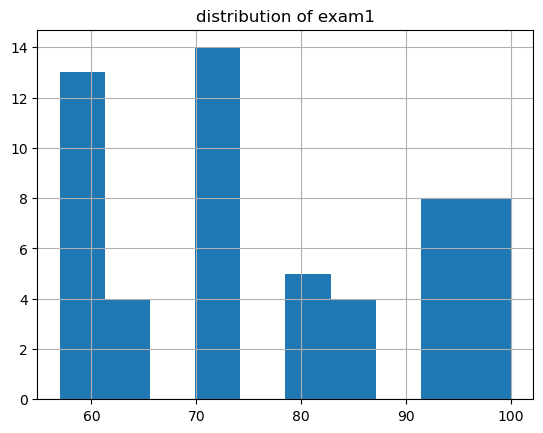

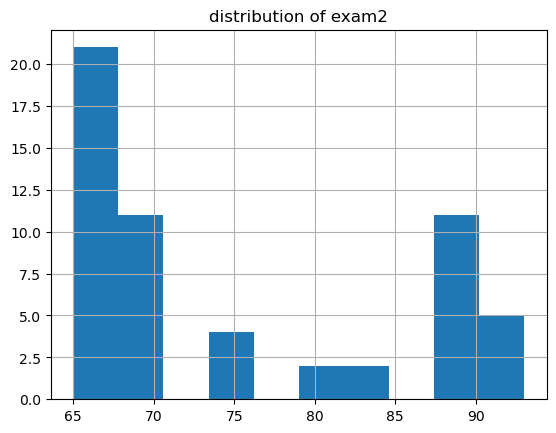

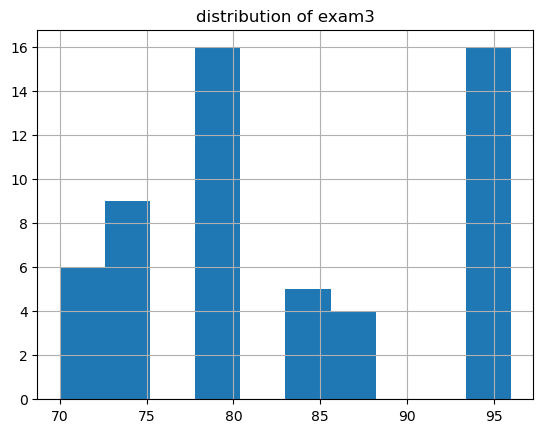

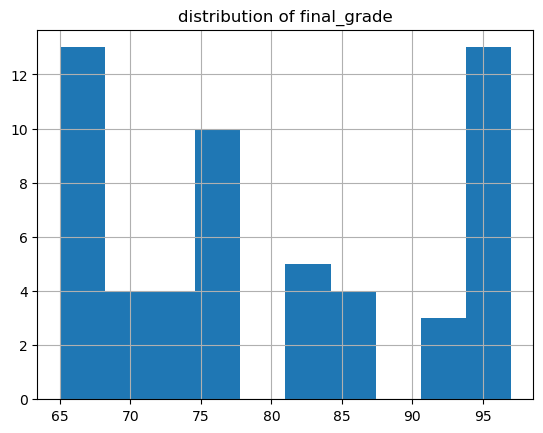

In [45]:
# lets check out how normal these things are
for col in train:
    train[col].hist()
    plt.title(f'distribution of {col}')
    plt.show()

this data isn't very normal

- is this becuase the sample size is somewhat smaller
- is this beacuse there are different types of stude3nts
- if there are different types, how would we recognise them
- will this effect my modeling?

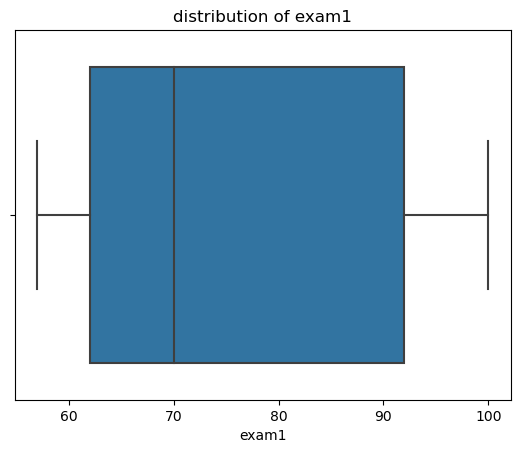

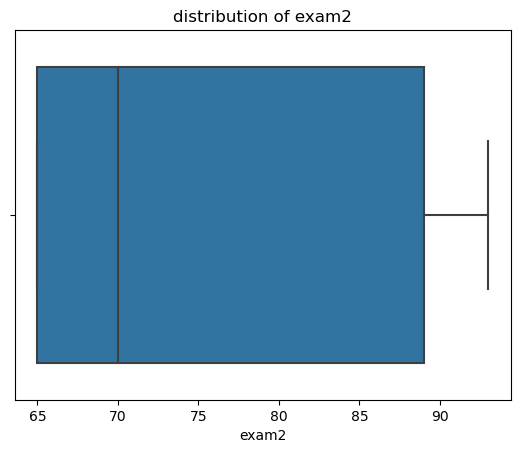

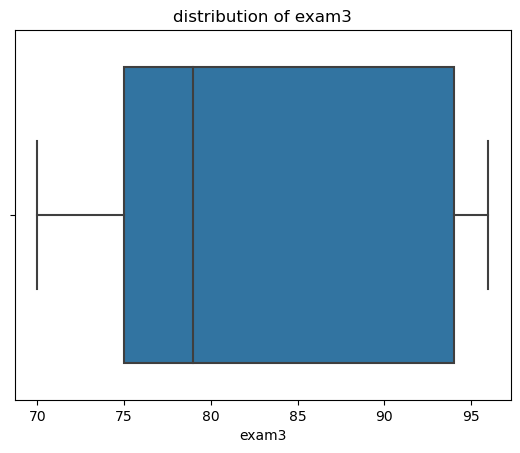

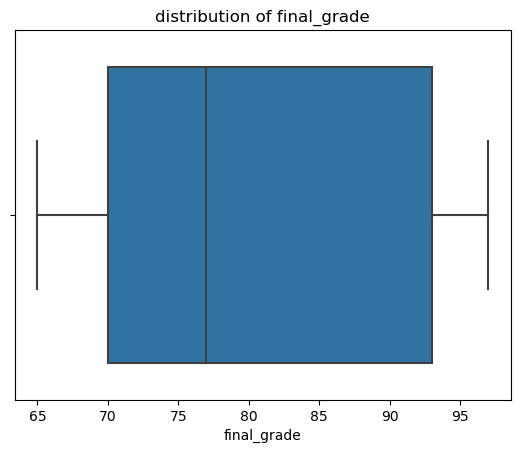

In [55]:
for col in train:
    sns.boxplot(data=train, x=col)
    plt.title(f'distribution of {col}')
    plt.show()